Author: **Vi-n1**

License: **MIT License**


# Importação das bibliotecas

In [1]:
import pandas as pd # Utilizado no tratamento e na manipulação dos dados.
from scipy.stats import shapiro # Utilizado no teste de normalidade.

import seaborn as sns # Utilizado na visualização de dados.
from matplotlib import pyplot as plt # Utilizado na visualização de dados.

from sklearn.linear_model import LogisticRegression # Modelo de predição.
from sklearn.preprocessing import LabelEncoder # Utilizado para transformar dados categóricos em numéricos.
from sklearn.model_selection import train_test_split # Utilizado para separar os dados de teste e de treino.
from sklearn.metrics import (f1_score, ConfusionMatrixDisplay, 
                             confusion_matrix, RocCurveDisplay,
                             auc, roc_curve) # Métricas usadas para medir a performance do modelo.

# Importação da base de dados

In [2]:
df = pd.read_csv('data/survey lung cancer.csv')
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


# Informações sobre os dados

Informações das colunas:
- Gender: M(male), F(female)
- Age: Age of the patient
- Smoking: YES=2 , NO=1.
- Yellow fingers: YES=2 , NO=1.
- Anxiety: YES=2 , NO=1.
- Peer_pressure: YES=2 , NO=1.
- Chronic Disease: YES=2 , NO=1.
- Fatigue: YES=2 , NO=1.
- Allergy: YES=2 , NO=1.
- Wheezing: YES=2 , NO=1.
- Alcohol: YES=2 , NO=1.
- Coughing: YES=2 , NO=1.
- Shortness of Breath: YES=2 , NO=1.
- Swallowing Difficulty: YES=2 , NO=1.
- Chest pain: YES=2 , NO=1.
- Lung Cancer: YES , NO.

fonte: https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer/data

### Informações gerais

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

### Número de valores ausentes em cada coluna

In [4]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

### Descrição dos dados

In [5]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


### Quantidade de valores duplicados

In [6]:
df.duplicated().sum()

33

In [7]:
df.shape

(309, 16)

A base de dados contém **309** linhas e **16** colunas, dessas **309** linhas **33** são duplicadas.

### Remoção dos valores duplicados

In [8]:
df.drop_duplicates(inplace=True)
df.shape

(276, 16)

Com a remoção das linhas duplicadas a base de dados ficou com **276** linhas.

# Transformando as variáveis categóricas em numéricas

In [9]:
encoder = LabelEncoder()
df['GENDER'] = encoder.fit_transform(df['GENDER'])
df['LUNG_CANCER'] = encoder.fit_transform(df['LUNG_CANCER'])

In [10]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


Transformação dos dados:

| Coluna       | Valor categórico  | Valor numérico |
| --------     | -------           |  -------       | 
| GENDER       |         M         |       1        |
| GENDER       |         F         |       0        |
| LUNG_CANCER  |         YES       |       1        |
| LUNG_CANCER  |         NO        |       0        |

# Teste de normalidade

In [11]:
SIG = 0.05
for coluna in df.columns:
    s, p = shapiro(df[coluna])
    if p > SIG:
        print(f'Estatística do teste: {s}, P valor: {p}\n({coluna}) -> normalmente distribuída.\n')
    else:
        print(f'Estatística do teste: {s}, P valor: {p}\n({coluna}) -> não é normalmente distribuída.\n')

Estatística do teste: 0.6361709237098694, P valor: 7.745170473813781e-24
(GENDER) -> não é normalmente distribuída.

Estatística do teste: 0.9767325520515442, P valor: 0.00017846515402197838
(AGE) -> não é normalmente distribuída.

Estatística do teste: 0.6337209939956665, P valor: 6.609615455939903e-24
(SMOKING) -> não é normalmente distribuída.

Estatística do teste: 0.6279991269111633, P valor: 4.578760503055804e-24
(YELLOW_FINGERS) -> não é normalmente distribuída.

Estatística do teste: 0.6364585161209106, P valor: 7.89104347696363e-24
(ANXIETY) -> não é normalmente distribuída.

Estatística do teste: 0.6364014148712158, P valor: 7.861849312583211e-24
(PEER_PRESSURE) -> não é normalmente distribuída.

Estatística do teste: 0.6357886791229248, P valor: 7.555547244860376e-24
(CHRONIC DISEASE) -> não é normalmente distribuída.

Estatística do teste: 0.5965942740440369, P valor: 6.575884355278331e-25
(FATIGUE ) -> não é normalmente distribuída.

Estatística do teste: 0.633242487907409

# Informações gráficas

### Mapa de calor da correlação dos dados

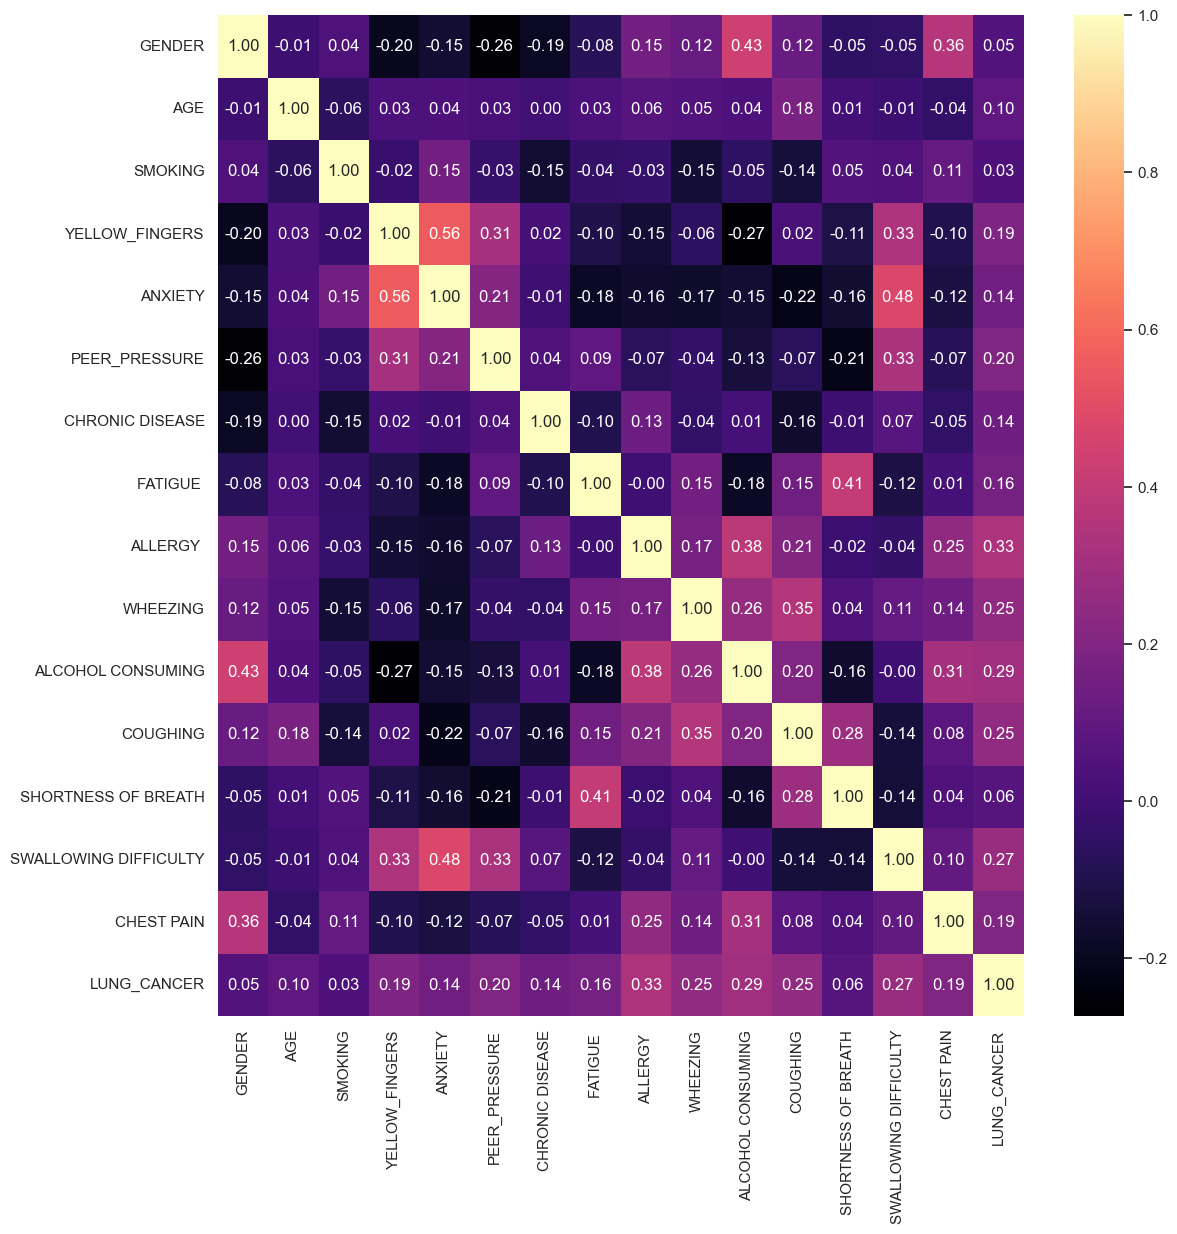

In [12]:
sns.set_theme()
plt.figure(figsize=(13, 13))
sns.heatmap(df.corr(method='spearman'), annot=True, cmap='magma', fmt=".2f")
%cls

### Diagrama de caixa 

#### IQR das idades das pessoas que tem ou não câncer, separados por gênero

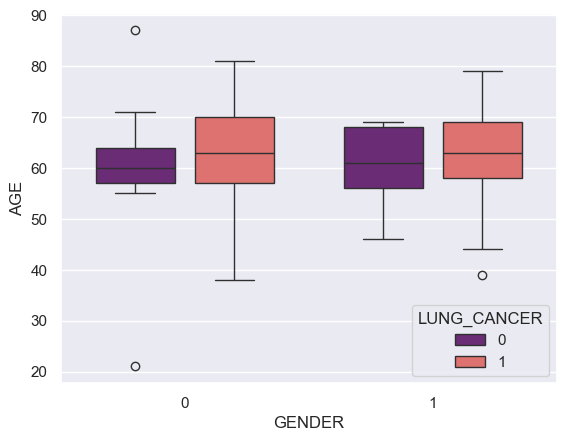

In [13]:
sns.boxplot(y=df['AGE'], x=df['GENDER'], hue=df['LUNG_CANCER'], palette='magma', gap=.2)
%cls

#### IQR das idades das pessoas que é fumante ou não fumante, separados ter ou não ter câncer

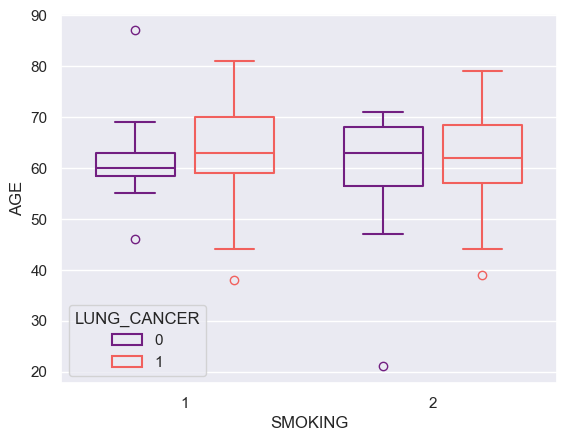

In [14]:
sns.boxplot(x=df['SMOKING'], y=df['AGE'], hue=df['LUNG_CANCER'], palette='magma', fill=False, gap=.2)
%cls

#### IQR das idades das pessoas que tem ou não o transtorno de ansiedade, separados ter ou não ter câncer

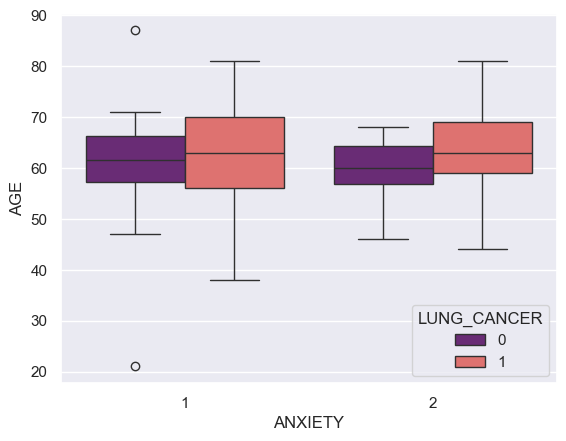

In [15]:
sns.boxplot(x=df['ANXIETY'], y=df['AGE'], hue=df['LUNG_CANCER'], palette="magma", dodge=True)
%cls

### Distribuição da idade

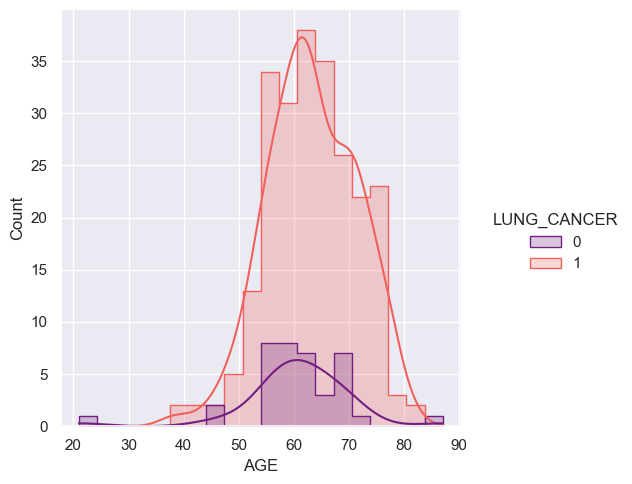

In [16]:
sns.displot(x=df['AGE'], hue=df['LUNG_CANCER'], palette='magma', element='step', kde=True)
%cls

# Dividindo os dados em dados de testes e de treino

In [17]:
X = df.drop(columns='LUNG_CANCER')
y = df['LUNG_CANCER']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

# Criação do Modelo

In [18]:
model = LogisticRegression(random_state=2, max_iter= 189)
model.fit(X_train, y_train)

LogisticRegression(max_iter=189, random_state=2)

# Métricas

## Accuracy(Precisão)

In [19]:
acc = model.score(X_test, y_test)

## F1-score

In [20]:
y_pred = model.predict(X_test)
f1s = f1_score(y_test, y_pred)

## ROC AUC(Curva ROC)

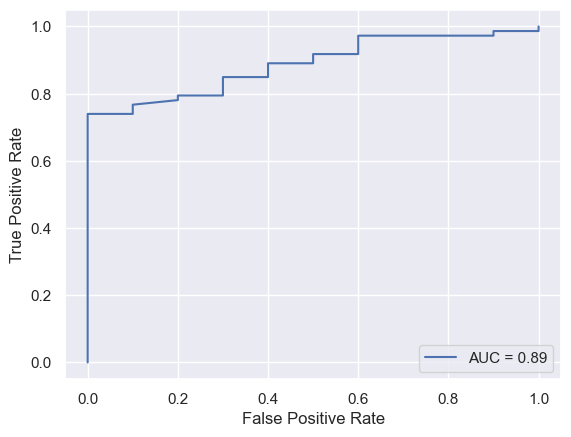

In [21]:
y_pred_prob = model.predict_proba(X_test)
fpr, tpr, t= roc_curve(y_test, y_pred_prob[:,1])
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
%cls

## Confusion matrix(Matriz de confusão)

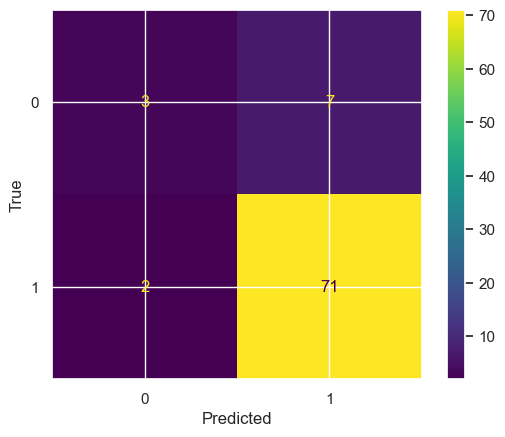

In [22]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')
%cls

# Resultado do modelo

In [23]:
rst_model = pd.DataFrame(columns=['Metrícas', 'Performance'])
rst_model['Metrícas'] = ['Accuracy', 'f1 score', 'Confusion matrix', 'ROC AUC']
rst_model['Performance'] = [acc, f1s, cm, roc_auc]
rst_model

,Metrícas,Performance
0,Accuracy,0.891566
1,f1 score,0.940397
2,Confusion matrix,"[[3, 7], [2, 71]]"
3,ROC AUC,0.886986


***dataset: https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer/data***